Data Collection and Preprocessing

Collect historical financial data, which includes features like age, income, loan amount, credit history, etc.
Clean and preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.

Exploratory Data Analysis (EDA)

Perform EDA to understand the distribution of features and their relationships with the target variable (creditworthiness).
Visualize data using plots to identify patterns and correlations.

Feature Selection

Select relevant features that contribute significantly to the prediction of creditworthiness.
Remove irrelevant or redundant features.

Splitting the Data

Split the dataset into training and testing sets to evaluate the model's performance.

Model Selection and Training

Choose classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, etc.).
Train multiple models and tune their hyperparameters.

Model Evaluation

Evaluate the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
Compare the performance of different models and select the best one.

Model Deployment

Deploy the final model for predicting the creditworthiness of new individuals.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the Data
data_path = 'd:/Credit score Intern/CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Data Info:")
print(data.info())
print("\nFirst few rows of the data:")
print(data.head())

# Step 2: Handle Missing Values
# Fill missing values with forward fill method
data.ffill(inplace=True)

# Step 3: Encode Categorical Variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Step 4: Scale Numerical Features
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display the preprocessed data
print("\nPreprocessed Data:")
print(data.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB
None

First few rows of the data:
   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Fe

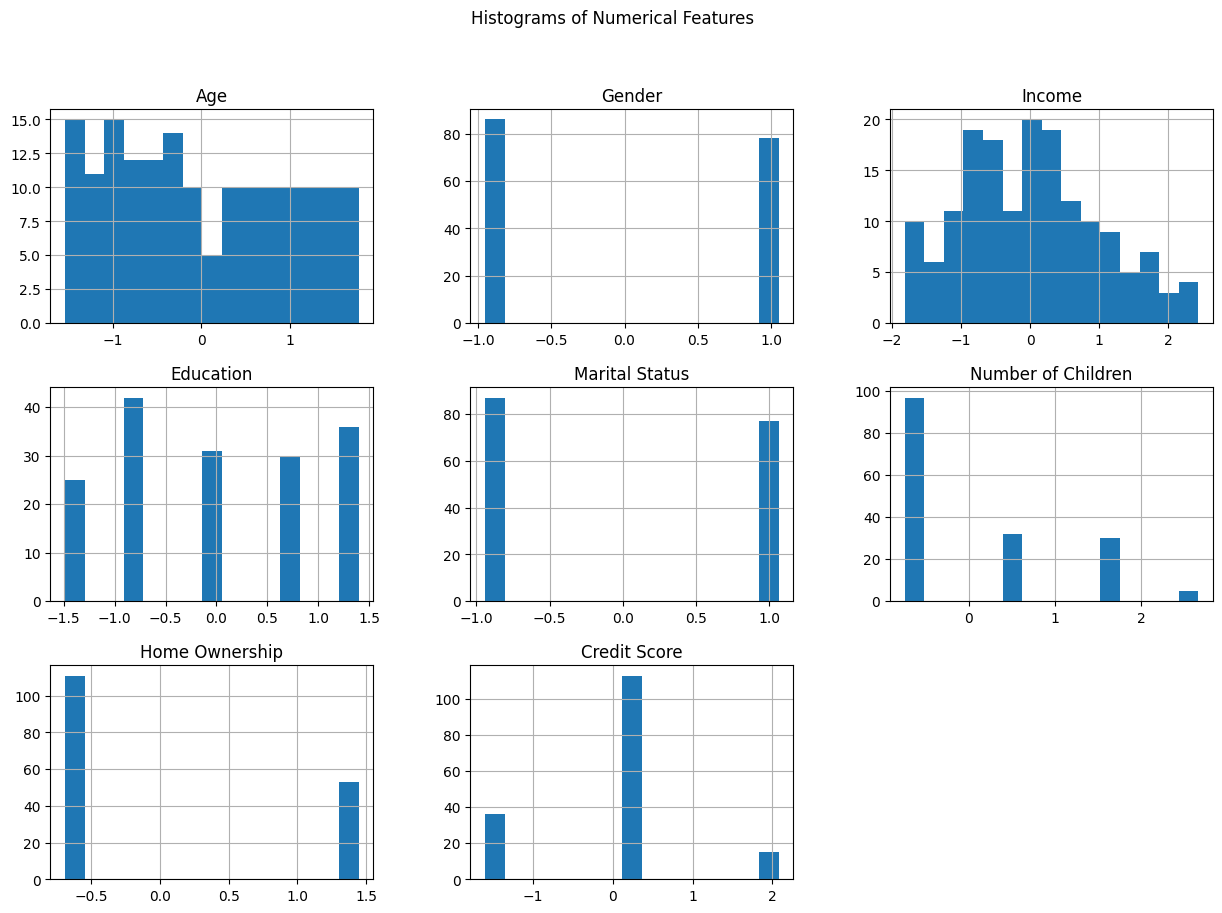

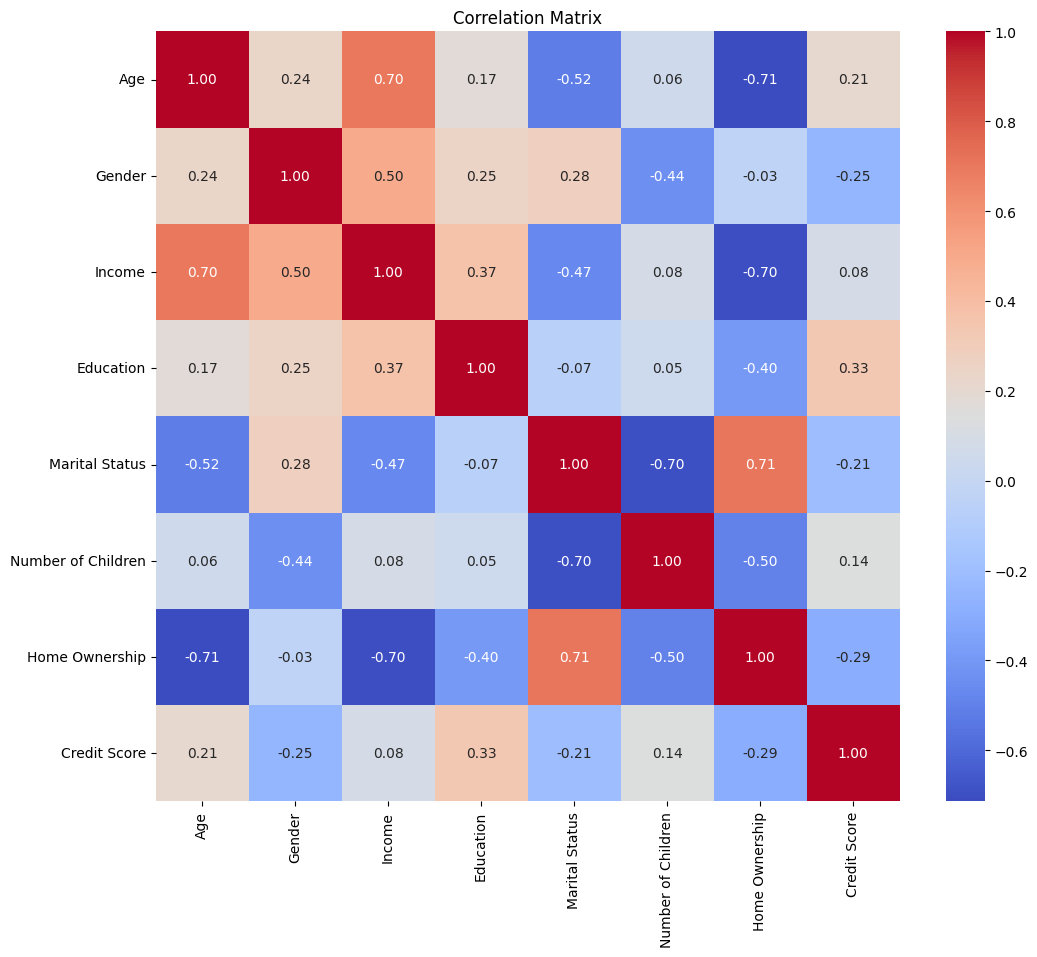

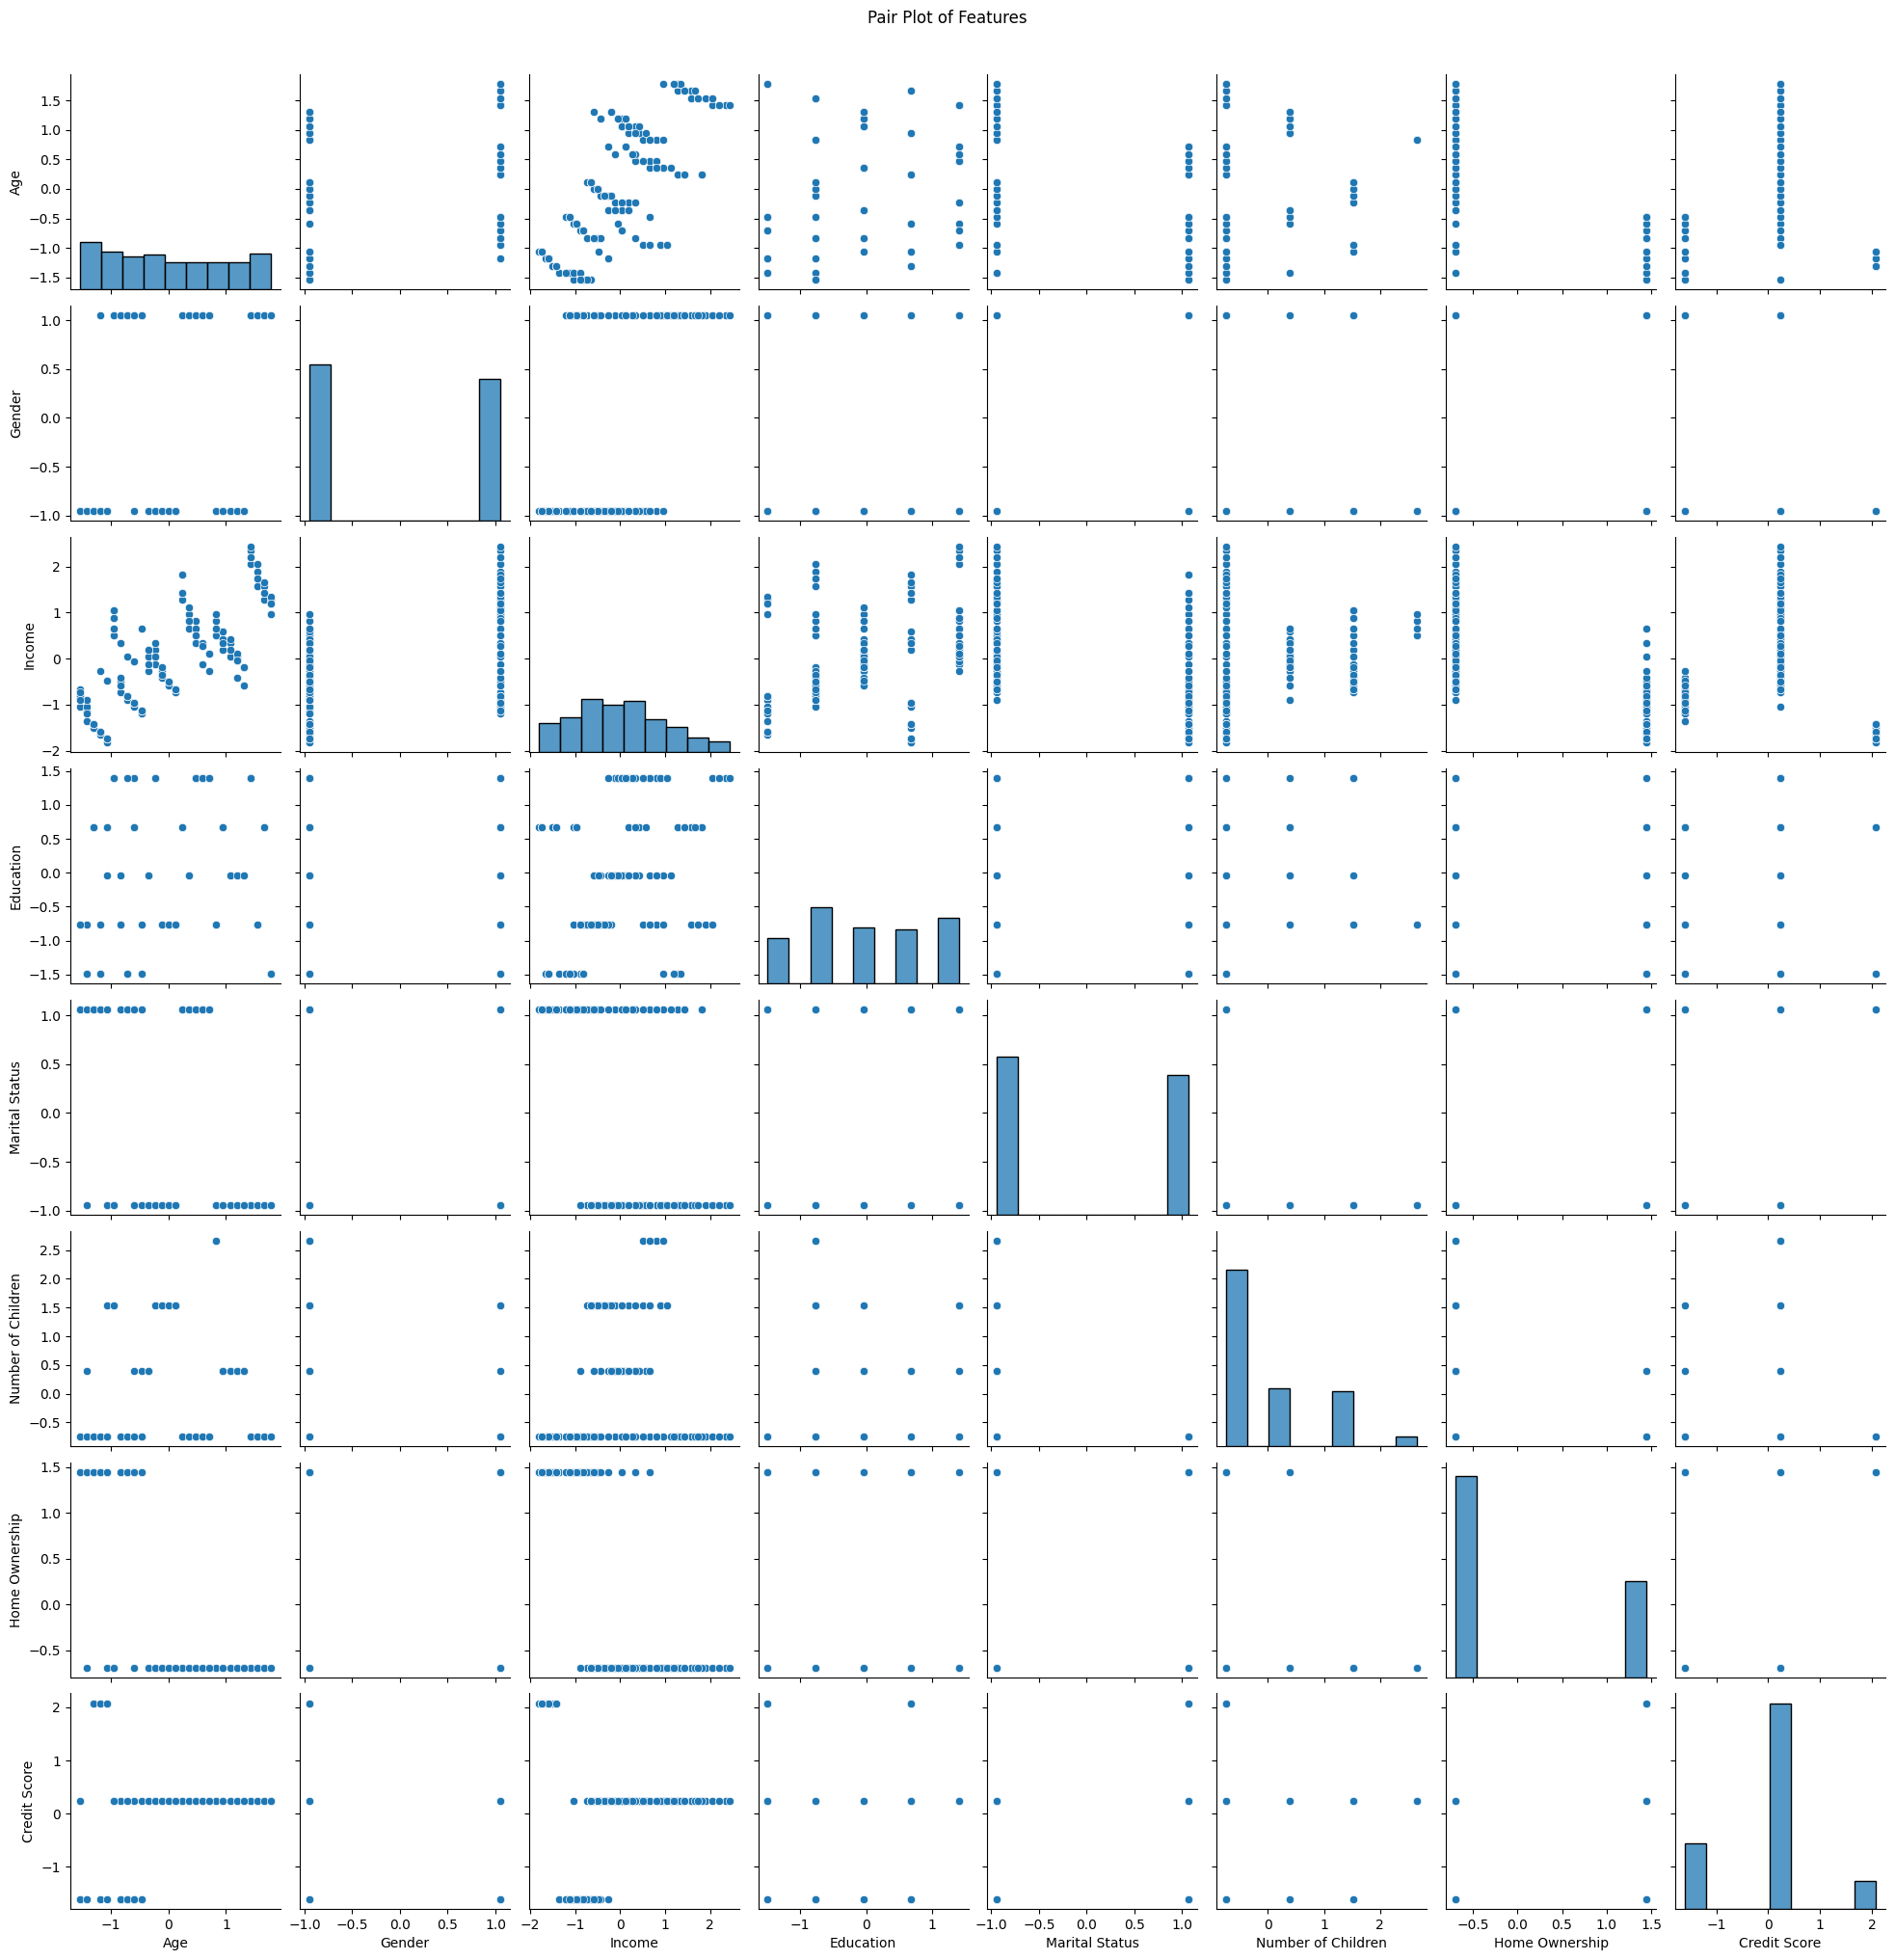

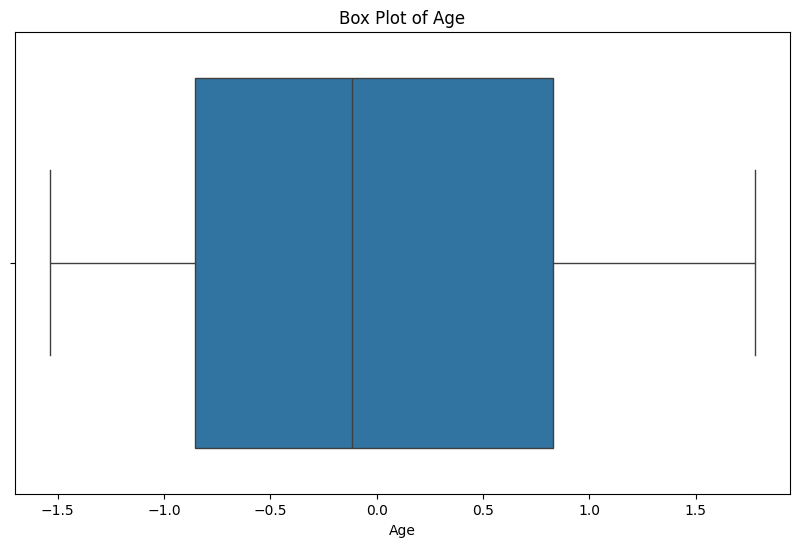

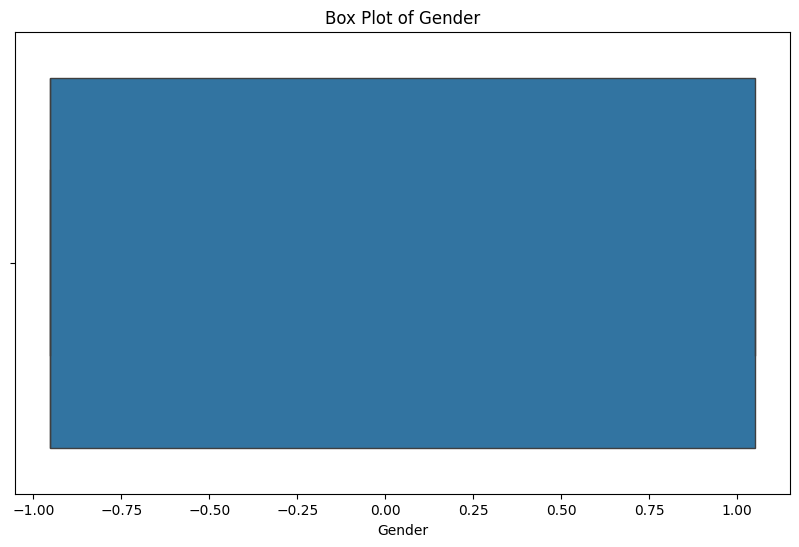

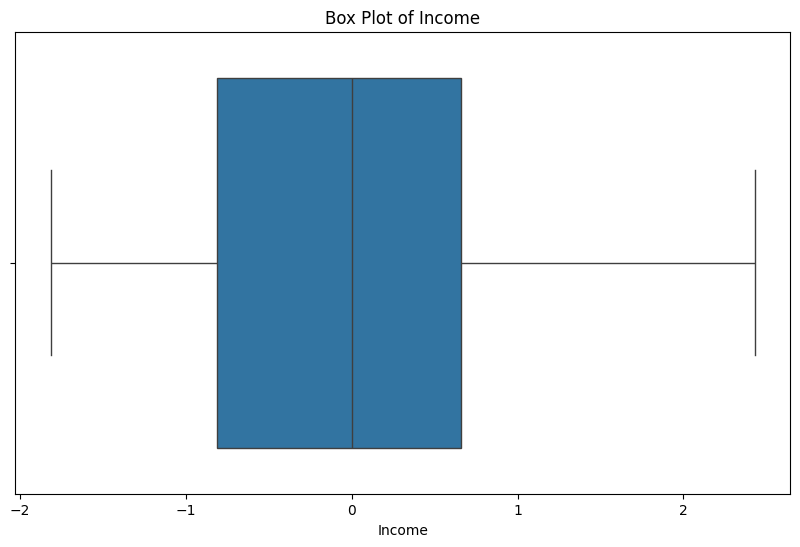

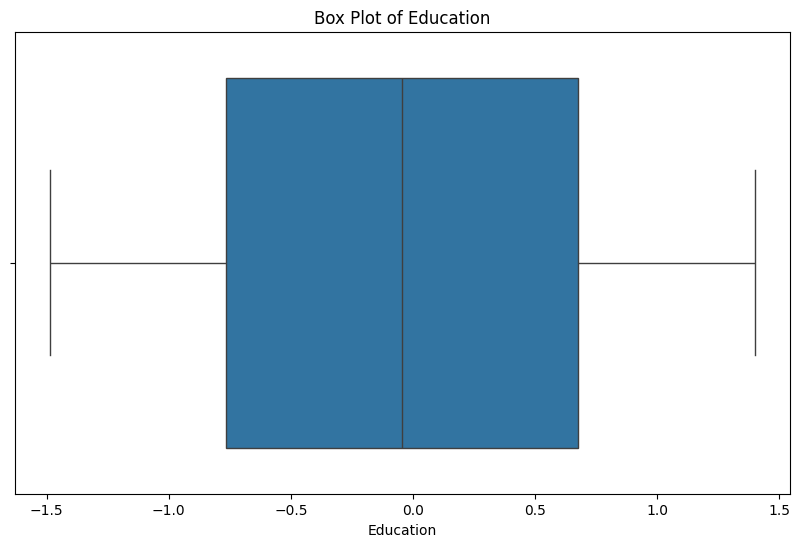

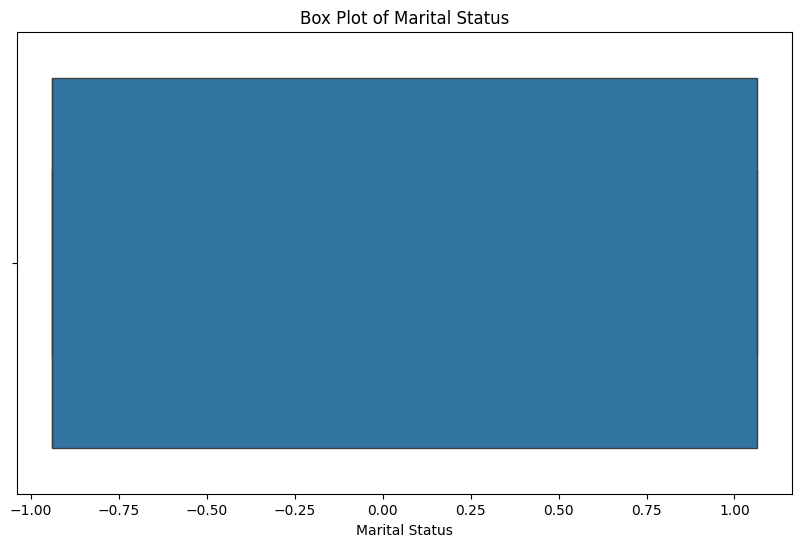

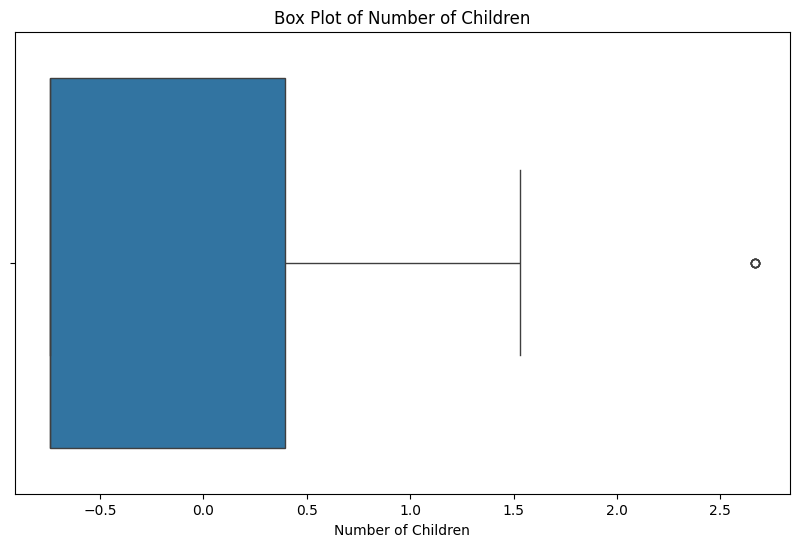

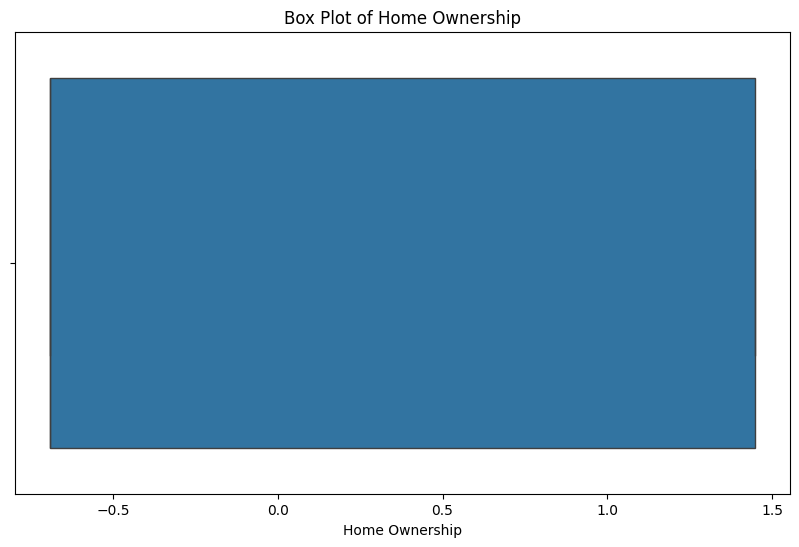

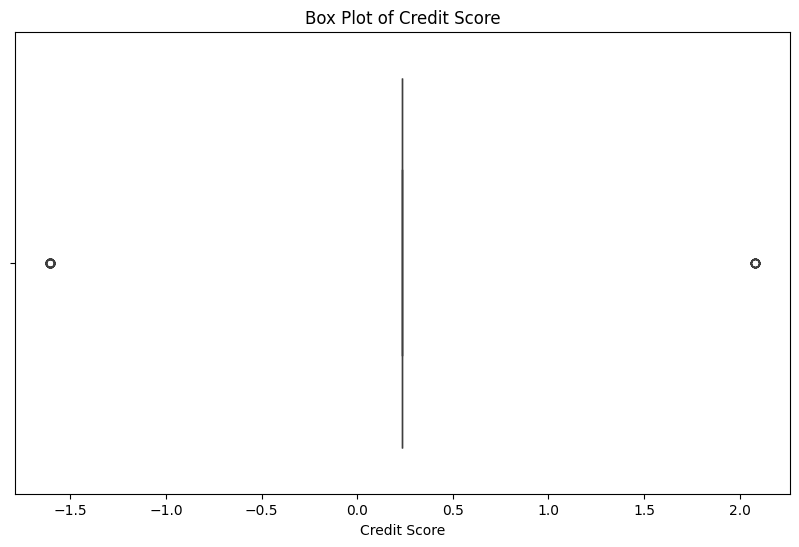

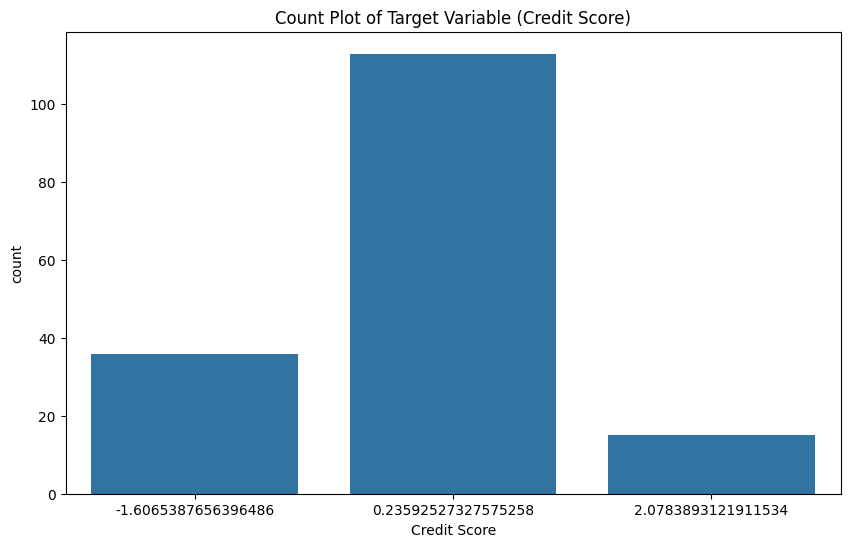

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Data (if not already loaded)
data_path = 'd:/Credit score Intern/CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Step 2: Handle Missing Values
data.ffill(inplace=True)

# Step 3: Encode Categorical Variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Step 4: Scale Numerical Features
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Step 5: Exploratory Data Analysis (EDA)

# Distribution of numerical features
data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pair plot of the features
sns.pairplot(data)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Box plots of numerical features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Box Plot of {feature}")
    plt.show()

# Count plot of categorical features
categorical_features = [col for col in data.columns if col not in numeric_features]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f"Count Plot of {feature}")
    plt.show()

# Check for class imbalance in the target variable
target_variable = 'Credit Score'  # Ensure this is the correct target variable name
plt.figure(figsize=(10, 6))
sns.countplot(x=data[target_variable])
plt.title("Count Plot of Target Variable (Credit Score)")
plt.show()


C:\Users\Madhankumar\AppData\Local\Temp\ipykernel_2908\3696027913.py:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(y):


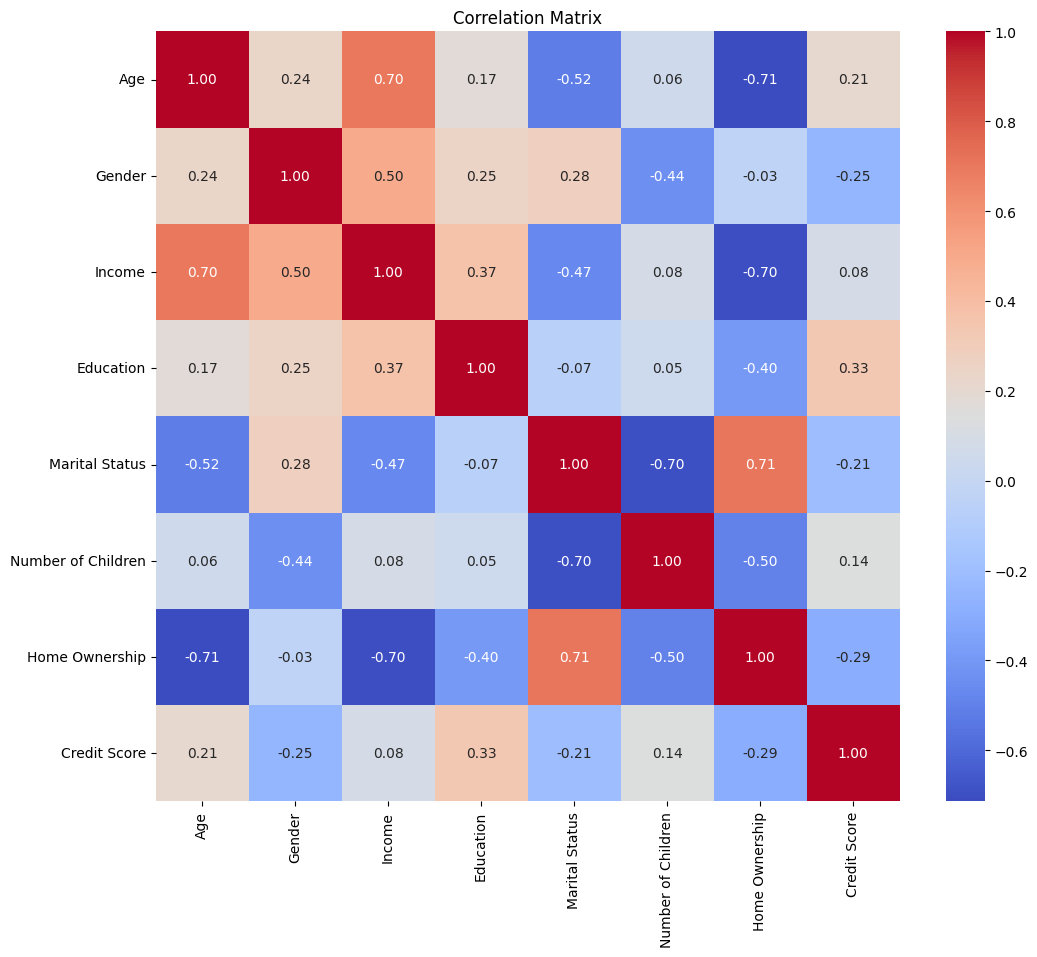

Selected features based on correlation analysis: ['Age', 'Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']


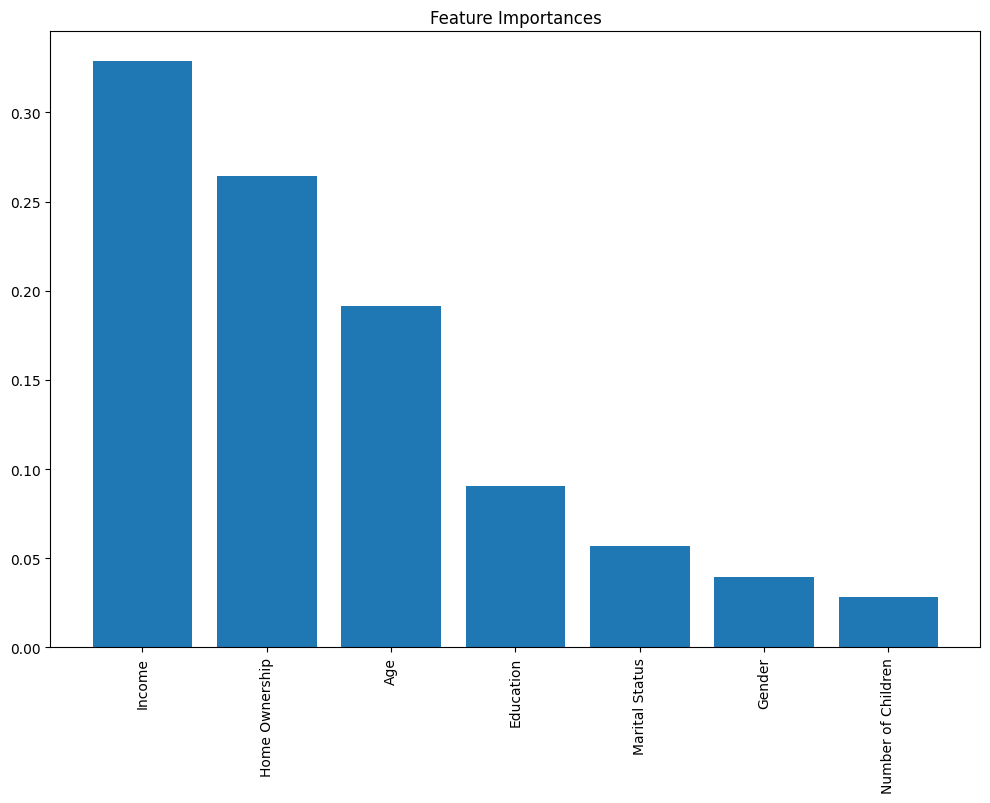

Selected features based on feature importance: ['Income', 'Home Ownership', 'Age', 'Education', 'Marital Status', 'Gender', 'Number of Children']
Selected features based on RFE: ['Age', 'Income', 'Education', 'Marital Status', 'Home Ownership']
Final selected features: ['Education', 'Home Ownership', 'Age', 'Marital Status']


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data (if not already done)
data_path = 'd:/Credit score Intern/CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Handle missing values
data.ffill(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Scale numerical features
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Define the target variable
target_variable = 'Credit Score'  # Ensure this is the correct target variable name
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Ensure the target variable is categorical
if not pd.api.types.is_categorical_dtype(y):
    y = pd.Categorical(y).codes

# Step 1: Correlation Analysis
# Calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Select features with correlation threshold
correlation_threshold = 0.1  # Adjust this threshold as needed
corr_features = corr_matrix.index[abs(corr_matrix[target_variable]) > correlation_threshold].tolist()

# Remove the target variable from the list of features
corr_features.remove(target_variable)
X_corr = X[corr_features]

print("Selected features based on correlation analysis:", corr_features)

# Step 2: Feature Importance from RandomForest
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Select features based on importance threshold
importance_threshold = 0.01  # Adjust this threshold as needed
important_features = [X.columns[indices[i]] for i in range(len(importances)) if importances[indices[i]] > importance_threshold]
X_import = X[important_features]

print("Selected features based on feature importance:", important_features)

# Step 3: Recursive Feature Elimination (RFE)
# Using RandomForest as the estimator
rfe = RFE(rf, n_features_to_select=5)  # Adjust the number of features to select as needed
rfe.fit(X, y)

# Get selected features
rfe_features = X.columns[rfe.support_]

print("Selected features based on RFE:", rfe_features.tolist())
X_rfe = X[rfe_features]

# Print final selected features from all methods
final_features = list(set(corr_features) & set(important_features) & set(rfe_features))
print("Final selected features:", final_features)


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data (if not already done)
data_path = 'd:/Credit score Intern/CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Handle missing values
data.ffill(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Scale numerical features
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Define the target variable
target_variable = 'Credit Score'  # Ensure this is the correct target variable name
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Ensure the target variable is categorical
if not pd.api.types.is_categorical_dtype(y):
    y = pd.Categorical(y).codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 131
Testing set size: 33


C:\Users\Madhankumar\AppData\Local\Temp\ipykernel_2908\3353161113.py:35: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(y):


In [7]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)
    
    return model

# Initialize models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train and evaluate models
logistic_regression = train_and_evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)
random_forest = train_and_evaluate_model(random_forest, X_train, X_test, y_train, y_test)
gradient_boosting = train_and_evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)


Model: LogisticRegression
Accuracy: 0.9394
Precision: 0.9394
Recall: 0.9394
F1 Score: 0.9394
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9697
Precision: 0.9710
Recall: 0.9697
F1 Score: 0.9683
------------------------------
Model: GradientBoostingClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------


C:\Users\Madhankumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9091
Precision: 0.9192
Recall: 0.9091
F1 Score: 0.9115
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9091
Precision: 0.9178
Recall: 0.9091
F1 Score: 0.9122
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.9394
Precision: 0.9567
Recall: 0.9394
F1 Score: 0.9431
------------------------------


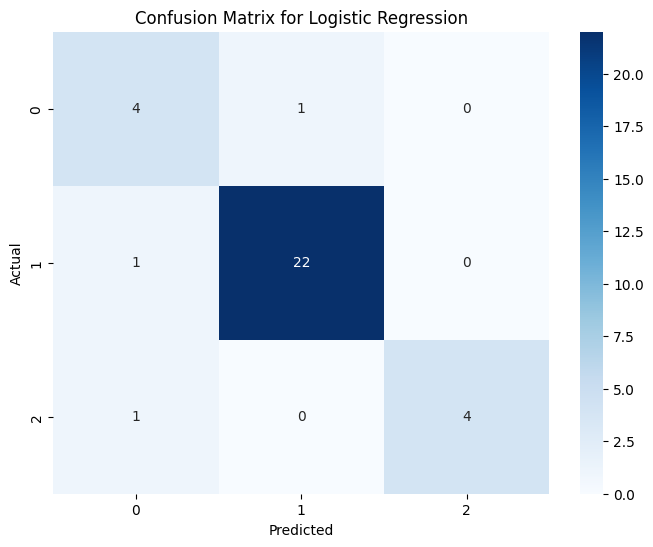

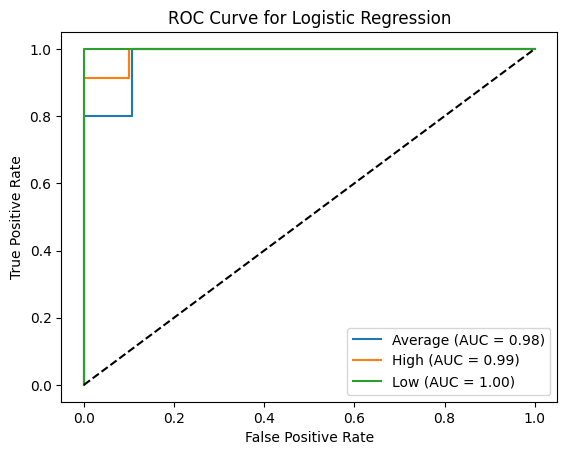

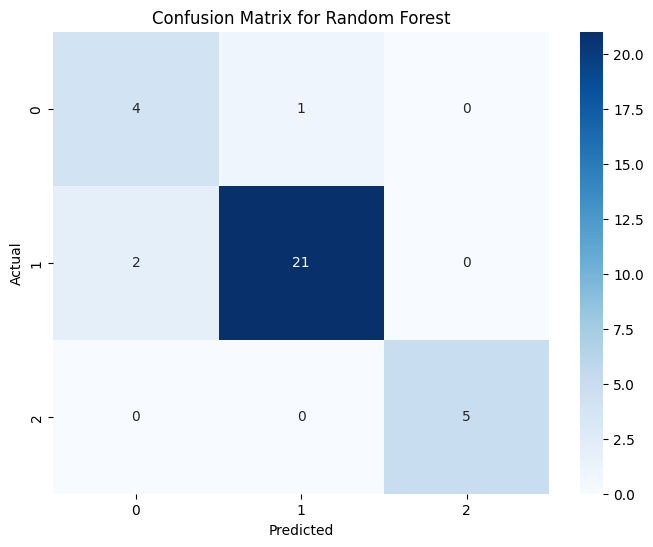

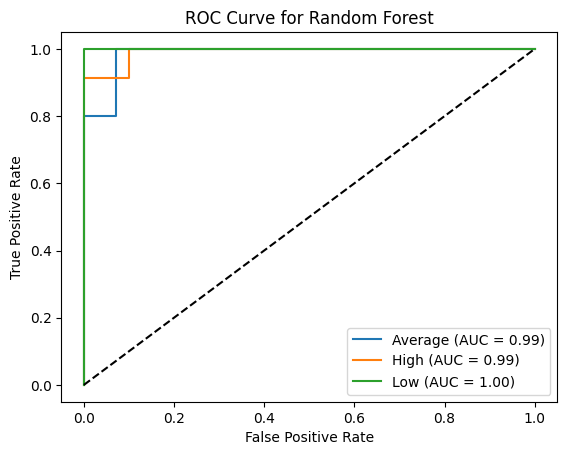

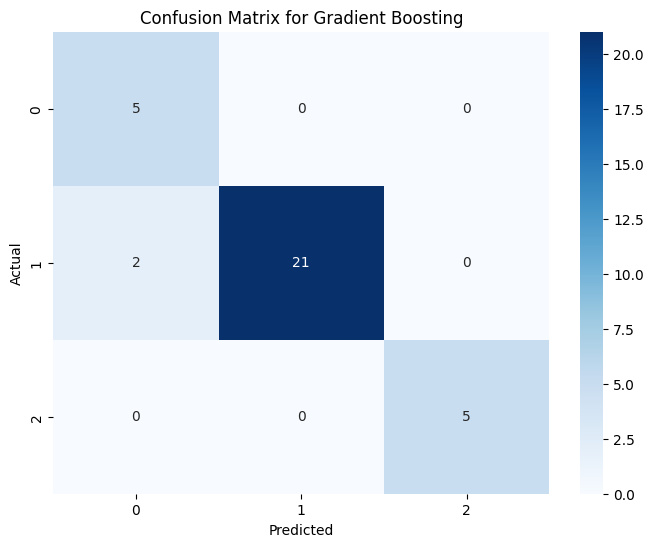

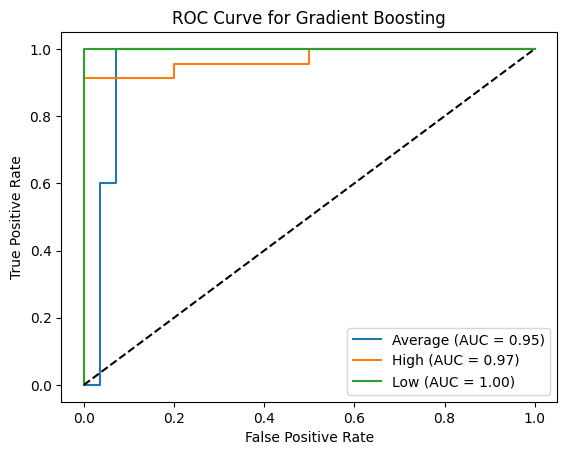

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data (if not already done)
data_path = 'CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Feature selection based on correlation analysis
selected_features = ['Age', 'Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']
X = data[selected_features]
y = data['Credit Score']

# Encode categorical features
X = pd.get_dummies(X)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)
    
    return model

# Initialize models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train and evaluate models
logistic_regression = train_and_evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)
random_forest = train_and_evaluate_model(random_forest, X_train, X_test, y_train, y_test)
gradient_boosting = train_and_evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    # Compute ROC curve and ROC area for each class
    for i in range(len(label_encoder.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_pred_proba[:, i])
        plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

# Evaluate Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
plot_roc_curve(logistic_regression, X_test, y_test, 'Logistic Regression')

# Evaluate Random Forest
y_pred_rf = random_forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_roc_curve(random_forest, X_test, y_test, 'Random Forest')

# Evaluate Gradient Boosting
y_pred_gb = gradient_boosting.predict(X_test)
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
plot_roc_curve(gradient_boosting, X_test, y_test, 'Gradient Boosting')


In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data_path = 'CreditScoreClassificationDataset.csv'
data = pd.read_csv(data_path)

# Preprocess the data
data.fillna(method='ffill', inplace=True)
data = pd.get_dummies(data, columns=['Gender', 'Education', 'Marital Status', 'Home Ownership'], drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
data['Credit Score'] = label_encoder.fit_transform(data['Credit Score'])

# Split the data into features and target variable
X = data.drop('Credit Score', axis=1)
y = data['Credit Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

evaluate_model(logistic_regression, X_test, y_test)
evaluate_model(random_forest, X_test, y_test)
evaluate_model(gradient_boosting, X_test, y_test)

# Save the trained models
joblib.dump(logistic_regression, 'logistic_regression_model.pkl')
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(gradient_boosting, 'gradient_boosting_model.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Save the feature columns
joblib.dump(X.columns, 'feature_columns.pkl')


C:\Users\Madhankumar\AppData\Local\Temp\ipykernel_14436\3329891609.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Madhankumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9394
Precision: 0.9407
Recall: 0.9394
F1 Score: 0.9380
------------------------------
Model: RandomForestClassifier
Accuracy: 0.9091
Precision: 0.9178
Recall: 0.9091
F1 Score: 0.9122
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.9394
Precision: 0.9567
Recall: 0.9394
F1 Score: 0.9431
------------------------------


['feature_columns.pkl']